# KNN iris 다중분류 (Multiclass Classification)
---

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle 

In [21]:
import warnings

warnings.filterwarnings('ignore')


In [22]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
        
    df['species']= df['species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['species'], axis=1)
    y= df['species']

    X, y = shuffle(X, y, random_state=2022)
    num = int(len(y)*0.8)
    
    X_train = X.iloc[:num,:]    
    X_test = X.iloc[num:,:]      
    y_train = y.iloc[:num]        
    y_test  = y.iloc[num:]       
    
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [24]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [25]:
from sklearn.neighbors import KNeighborsClassifier
scores = []

for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    s = clf.score(X_train, y_train)
    scores.append(s)

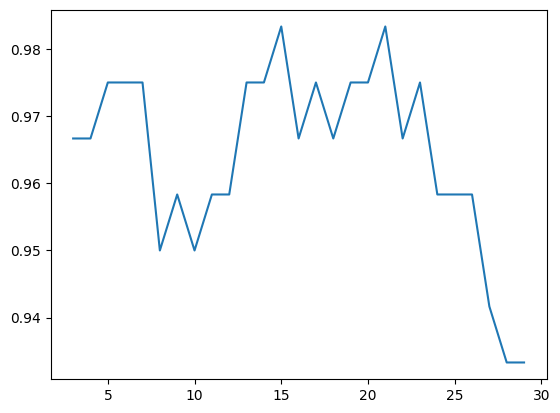

In [26]:
plt.plot(np.arange(3, 30), scores)
plt.show()

### 최종 

In [27]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)


KNeighborsClassifier()

### 예측

In [29]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 2, 2], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    rec = recall_score(y_true, y_pred, average=average)

    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [36]:
print_score(y_test, y_pred, average='macro')

accuraccy: 0.9333333333333333
precision: 0.9333333333333332
recall: 0.9393939393939394
